In [1]:
import networkx as nx
import numpy as np
from itertools import combinations

In [2]:
file1 = open('input.txt', 'r')
lines = file1.readlines()

In [3]:
input = np.array([list(line.strip()) for line in lines], dtype=str)
start = np.where(input[0,]==".")[0][0]
stop = np.where(input[-1,]==".")[0][0]

In [4]:
G = nx.DiGraph()

location_to_inspect = [(0, 1), (1, 0), (0, -1), (-1, 0)]
for i in range(input.shape[0]):
    for j in range(input.shape[1]):
        if input[i,j] == ".":
            for loc in location_to_inspect:
                target = (i+loc[0], j+loc[1])
                if target[0] >= 0 and target[0] < input.shape[0] and target[1] >= 0 and target[1] < input.shape[1]:
                    if input[target] == ".":
                        G.add_edge((i,j), target)
                        G.add_edge(target, (i,j))
        elif input[i,j] == ">":
            G.add_edge((i,j), (i,j+1))
            G.add_edge((i,j-1), (i,j))
        elif input[i,j] == "<":
            G.add_edge((i,j), (i,j-1))
            G.add_edge((i,j+1), (i,j))
        elif input[i,j] == "^":
            G.add_edge((i,j), (i-1,j))
            G.add_edge((i+1,j), (i,j))
        elif input[i,j] == "v":
            G.add_edge((i,j), (i+1,j))
            G.add_edge((i-1,j), (i,j))


In [5]:
print(f"Part 1: {len(max(nx.all_simple_paths(G, (0, start), (input.shape[1]-1, stop)), key=len))-1}")

Part 1: 2130


In [6]:
G = nx.Graph()

location_to_inspect = [(0, 1), (1, 0), (0, -1), (-1, 0)]
allowed = [".", "^", "v", "<", ">"]
for i in range(input.shape[0]):
    for j in range(input.shape[1]):
        if input[i,j] in allowed:
            for loc in location_to_inspect:
                target = (i+loc[0], j+loc[1])
                if target[0] >= 0 and target[0] < input.shape[0] and target[1] >= 0 and target[1] < input.shape[1]:
                    if input[target] in allowed:
                        G.add_edge(target, (i,j))


In [7]:
keyNodes = []
for node in G.nodes:
    if len(G.edges(node)) != 2:
        keyNodes.append(node)

masterG = nx.Graph()

G = nx.Graph()

location_to_inspect = [(0, 1), (1, 0), (0, -1), (-1, 0)]
allowed = [".", "^", "v", "<", ">"]
for i in range(input.shape[0]):
    for j in range(input.shape[1]):
        if input[i,j] in allowed:
            for loc in location_to_inspect:
                target = (i+loc[0], j+loc[1])
                if target[0] >= 0 and target[0] < input.shape[0] and target[1] >= 0 and target[1] < input.shape[1]:
                    if input[target] in allowed:
                        w = 10000 if (i,j) in keyNodes else 1
                        G.add_edge(target, (i,j), weight=w)
cc = 0
for pair in combinations(keyNodes, 2):
    if nx.has_path(G, pair[0], pair[1]):
        s_path = nx.shortest_path(G, pair[0], pair[1], weight='weight')
        if len(list(set(s_path) & set(keyNodes))) == 2:
            masterG.add_edge(pair[0], pair[1], weight=len(s_path)-1)


In [8]:
print(f"Part 2: {max(nx.path_weight(masterG, i, 'weight') for i in nx.all_simple_paths(masterG, (0, start), (input.shape[1]-1, stop)))}")

Part 2: 6710


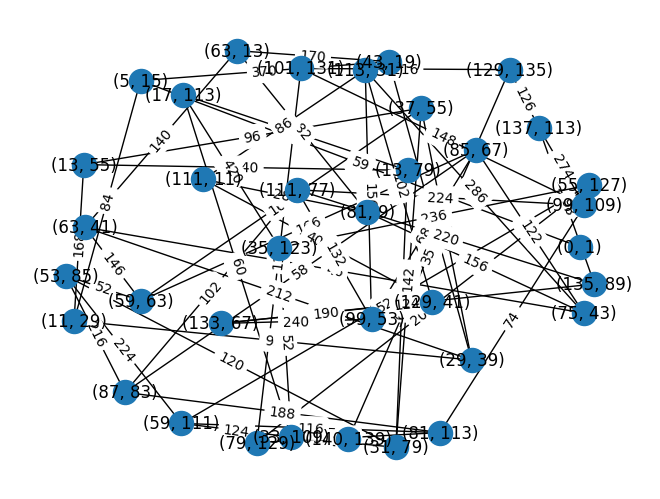

In [9]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(masterG, k=10)
nx.draw(masterG, pos=pos, with_labels=True)
labels = {e: masterG.edges[e]['weight'] for e in masterG.edges}
nx.draw_networkx_edge_labels(masterG, pos=pos, edge_labels=labels)
plt.show()